In [1]:
# Import Package
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, sqrt # Detect Missing Values
import matplotlib.pyplot as plt # Data Visualization
from pyspark.sql.functions import corr # Data Correlation
import seaborn as sns
from pyspark.sql import functions as F
import pandas as pd
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import count, when, col

spark = SparkSession.builder.appName('DataAnalyze').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 20:27:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# DU - Data Understanding

## Load data

In [2]:
# Load Initial Dataset
initial_data = spark.read.csv("Data.csv", header = True, inferSchema = True)

## Explore Data

In [3]:
num_rows = initial_data.count() + 1
num_column = len(initial_data.columns)
print("The dataset contains", num_rows, "rows(observations) and ", num_column, "columns(variables)")

The dataset contains 2300 rows(observations) and  10 columns(variables)


In [4]:
initial_data.show()

+-----------+-----------+-----------+-----------+-----------+------------+--------------+---------------+-----------+----------+
|         ph|   Hardness|     Solids|Chloramines|    Sulfate|Conductivity|Organic_carbon|Trihalomethanes|  Turbidity|Potability|
+-----------+-----------+-----------+-----------+-----------+------------+--------------+---------------+-----------+----------+
|7.080794504|219.6742619|22210.61308|5.875041088|333.7757766| 398.5177031|   11.50231563|    112.4122104| 2.99425921|         0|
|6.783888468|193.6535806|13677.10644|5.171453573|323.7286632| 477.8546873|   15.05606409|    66.39629295|3.250022229|         0|
|6.010617577|184.5585817|15940.57327|8.165222041|421.4860892| 314.5298134|   20.31461674|    83.70793779|4.867287404|         1|
|8.097453771|218.9924361|18112.28445|6.196947394|333.7757766| 376.5698034|   17.74626352|    59.90994087|4.279082404|         1|
|8.072612403|210.2697797|16843.36393|8.793458648|359.5161693| 559.1675739|   17.26357604|    68.7

In [5]:
initial_data.printSchema()

root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- Potability: integer (nullable = true)



In [6]:
initial_data.count()

2299

In [7]:
initial_data.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-------------------+
|summary|                ph|          Hardness|            Solids|       Chloramines|          Sulfate|      Conductivity|   Organic_carbon|  Trihalomethanes|         Turbidity|         Potability|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-------------------+
|  count|              2298|              2299|              2296|              2299|             2299|              2299|             2298|             2298|              2298|               2298|
|   mean| 7.081375767373759|196.33986146366271|22047.927439872354| 7.133267013569396|333.2003125040893|425.33997071396266|14.23098703169495|66.46271508529718| 3.967933545809406|0.38946910356832026|
| stddev|1

In [8]:
from pyspark.sql.functions import count, when, col
missing_counts = initial_data.select([count(when(col(c).isNull(), c)).alias(c) for c in initial_data.columns])
missing_counts.show()


+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
| ph|Hardness|Solids|Chloramines|Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
|  1|       0|     3|          0|      0|           0|             1|              1|        1|         1|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+



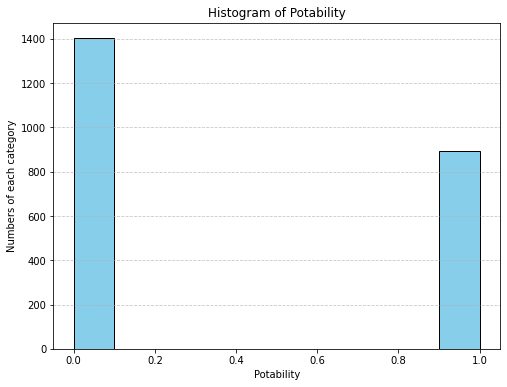

In [9]:
#  Visualization 
Potability_histogram = initial_data.select("Potability").toPandas()["Potability"]

plt.figure(figsize=(8, 6))
plt.hist(Potability_histogram, color='skyblue', edgecolor='black')  
plt.title(f'Histogram of {"Potability"}')
plt.xlabel("Potability") 
plt.ylabel('Numbers of each category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

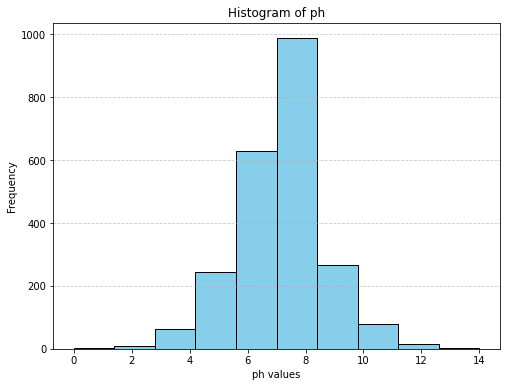

In [10]:
#  Visualization 
Potability_histogram = initial_data.select("ph").toPandas()["ph"]

plt.figure(figsize=(8, 6))
plt.hist(Potability_histogram, color='skyblue', edgecolor='black')  
plt.title(f'Histogram of {"ph"}')
plt.xlabel("ph values") 
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

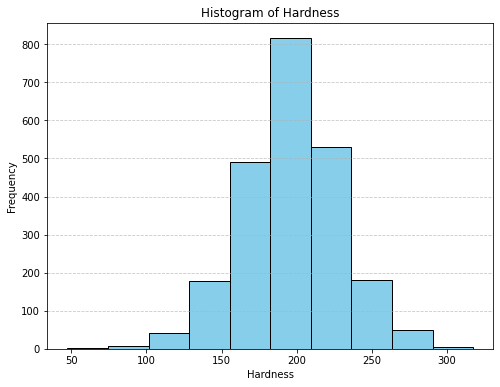

In [11]:
#  Visualization 
Potability_histogram = initial_data.select("Hardness").toPandas()["Hardness"]

plt.figure(figsize=(8, 6))
plt.hist(Potability_histogram, color='skyblue', edgecolor='black')  
plt.title(f'Histogram of {"Hardness"}')
plt.xlabel("Hardness") 
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

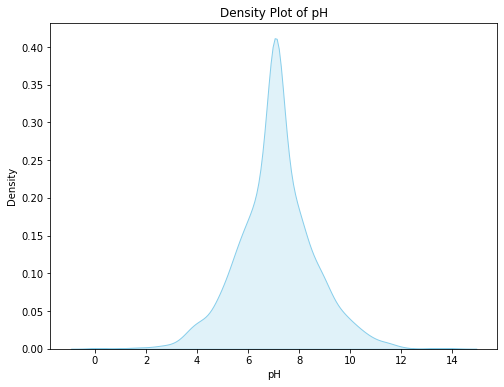

In [12]:
# Visualization 
# Convert Spark DataFrame to Pandas DataFrame
ph_for_density_plot = initial_data.select("ph").toPandas()

plt.figure(figsize = (8, 6))
sns.kdeplot(data = ph_for_density_plot, x = "ph", fill = True, color = "skyblue")
plt.title("Density Plot of pH")
plt.xlabel("pH")
plt.ylabel("Density")
plt.show()


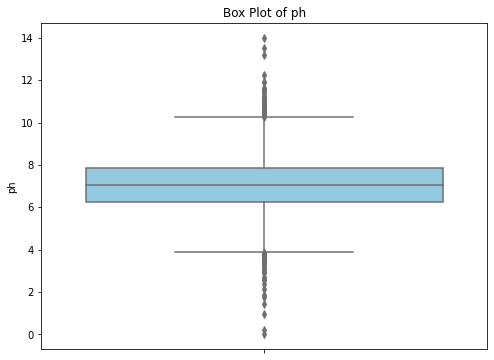

In [13]:
# Visualization 
# Convert Spark DataFrame to Pandas DataFrame
ph_for_box_plot = initial_data.select("ph").toPandas()

plt.figure(figsize = (8, 6))
sns.boxplot(data = ph_for_box_plot, y = "ph", color = "skyblue")
plt.title("Box Plot of ph")
plt.ylabel("ph")
plt.show()


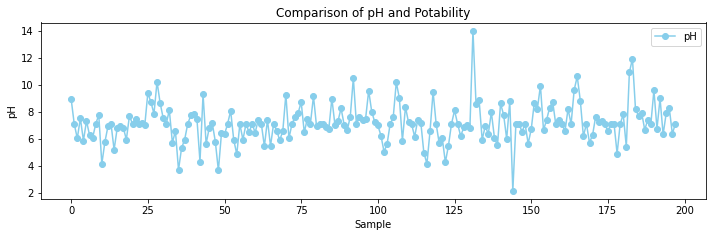

In [14]:
# Visualization 
sample_size = 200
data_for_plot = initial_data.sample(False, sample_size / initial_data.count()).toPandas()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data_for_plot.index, data_for_plot['ph'], marker='o', linestyle='-', color='skyblue', label='pH')
plt.title('Comparison of pH and Potability')
plt.xlabel('Sample')
plt.ylabel('pH')
plt.legend()


plt.tight_layout()
plt.show()

In [15]:
# Data Correlation
correlation_with_target = initial_data.select([corr(column, 'Potability').alias(f"corr_{column}_target") 
                                               for column in initial_data.columns if column != 'Potability'])
correlation_with_target.show()

23/10/12 20:28:16 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+--------------------+------------------+-----------------------+--------------------+------------------------+--------------------------+---------------------------+---------------------+
|      corr_ph_target|corr_Hardness_target|corr_Solids_target|corr_Chloramines_target| corr_Sulfate_target|corr_Conductivity_target|corr_Organic_carbon_target|corr_Trihalomethanes_target|corr_Turbidity_target|
+--------------------+--------------------+------------------+-----------------------+--------------------+------------------------+--------------------------+---------------------------+---------------------+
|-0.00738655445529...|-0.02179117090639711|0.0532449779560674|    0.01401371353315403|-0.01566132902379...|    -0.01786206192204...|      -0.00940944899547741|       0.002561635304360471| -0.00267346437780...|
+--------------------+--------------------+------------------+-----------------------+--------------------+------------------------+--------------------------+-

In [16]:
# Use groupBy to group and calculate means
result = initial_data.groupBy("Potability").agg(
    F.mean("ph").alias("mean_ph"),
    F.mean("Hardness").alias("mean_Hardness")
)
result.show()


+----------+-----------------+------------------+
|Potability|          mean_ph|     mean_Hardness|
+----------+-----------------+------------------+
|      null|             null|          145.4562|
|         1|7.067623964124005| 195.4769331648603|
|         0|7.090148300451862|196.92660735738394|
+----------+-----------------+------------------+



In [17]:
# Partition 
train_ratio = 0.8
test_ratio = 1 - train_ratio

train_data, test_data = initial_data.randomSplit([train_ratio, test_ratio], seed = 722)

print("The Number of training set:", train_data.count())
print("The number of testing set:", test_data.count())


The Number of training set: 1817
The number of testing set: 482


In [18]:
train_data.show()

+-----------+-----------+-----------+-----------+-----------+------------+--------------+---------------+-----------+----------+
|         ph|   Hardness|     Solids|Chloramines|    Sulfate|Conductivity|Organic_carbon|Trihalomethanes|  Turbidity|Potability|
+-----------+-----------+-----------+-----------+-----------+------------+--------------+---------------+-----------+----------+
|       null|   145.4562|        1.0|    6.14586|    300.588|    325.2556|       10.2563|         1.2568|    5.25632|      null|
|        0.0| 214.846144|49456.58711|7.897539037|333.7757766| 583.4488493|   7.702328207|    77.71289112| 4.92883998|         0|
| 0.22749905|152.5301112|39028.59934|3.462492048|283.6937822| 443.0292321|    13.2019432|    62.32271111|3.545741438|         1|
|0.989912213|133.2169416| 16922.8539|9.293288644|444.3757307| 322.2911912|   10.43007634|    43.57846551|5.160603788|         1|
|1.431781555|228.1303829|12937.24689|6.214772832|319.7341365| 495.3798827|   12.03334396|    61.1

In [19]:
# Detect the outliers
# Define the threshold
threshold = 2.5  
# A dict to store the outliers 
outlier_counts = {}

for col_name in initial_data.columns:
    if col_name != "Potability": 
        quantiles = initial_data.approxQuantile(col_name, [0.25, 0.75], 0.0)
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        outlier_count = initial_data.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound)).count()
        outlier_counts[col_name] = outlier_count
for col_name, count in outlier_counts.items():
    print(f"Variable '{col_name}': {count} outliers")

Variable 'ph': 12 outliers
Variable 'Hardness': 2 outliers
Variable 'Solids': 1 outliers
Variable 'Chloramines': 2 outliers
Variable 'Sulfate': 34 outliers
Variable 'Conductivity': 0 outliers
Variable 'Organic_carbon': 1 outliers
Variable 'Trihalomethanes': 2 outliers
Variable 'Turbidity': 0 outliers


# 03 - DP

In [20]:
# Remove Missing Values
cleaned_data = initial_data.dropna()
num_rows = cleaned_data.count() + 1
num_column = len(cleaned_data.columns)
print("The dataset contains", num_rows, "rows(observations) and ", num_column, "columns(variables)")

The dataset contains 2295 rows(observations) and  10 columns(variables)


In [21]:
# Remove the outliers

# Define the threshold
threshold = 2.5 

for col_name in cleaned_data.columns:
    if col_name != "Potability":
        cleaned_data = cleaned_data.withColumn(col_name, col(col_name).cast(DoubleType()))

        quantiles = initial_data.approxQuantile(col_name, [0.25, 0.75], 0.0)
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        cleaned_data = cleaned_data.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

num_rows = cleaned_data.count() + 1
num_column = len(cleaned_data.columns)
print("The dataset contains", num_rows, "rows(observations) and ", num_column, "columns(variables)")


The dataset contains 2247 rows(observations) and  10 columns(variables)


In [22]:
# Construct new data
from pyspark.sql.functions import col, when, sqrt
cleaned_data = cleaned_data.withColumn("Ratio of Solid to Hardness", when(col("Hardness") != 0, col("Solids") / col("Hardness")).otherwise(None))
cleaned_data = cleaned_data.withColumn("pH-Sulfate Product", col("ph") * col("Sulfate"))
cleaned_data = cleaned_data.withColumn("Ratio of Solid to Conductivity", when(col("Conductivity") != 0, col("Solids") / col("Conductivity")).otherwise(None))
cleaned_data = cleaned_data.withColumn("Solids to Turbidity Index", col("Solids") * col("Turbidity"))
cleaned_data = cleaned_data.withColumn("Ratio of Turbidity to Organic Carbon", when(col("Organic_carbon") != 0, col("Turbidity") / col("Organic_carbon")).otherwise(None))
cleaned_data = cleaned_data.withColumn("Ratio of Organic Carbon to Trihalomethanes", when(col("Trihalomethanes") != 0, col("Organic_carbon") / col("Trihalomethanes")).otherwise(None))
cleaned_data = cleaned_data.withColumn("Ratio of Chloramines to Conductivity", when(col("Conductivity") != 0, col("Chloramines") / col("Conductivity")).otherwise(None))
cleaned_data = cleaned_data.withColumn("sqrt_Solids", sqrt(col("Solids")))
cleaned_data.printSchema()

root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- Potability: integer (nullable = true)
 |-- Ratio of Solid to Hardness: double (nullable = true)
 |-- pH-Sulfate Product: double (nullable = true)
 |-- Ratio of Solid to Conductivity: double (nullable = true)
 |-- Solids to Turbidity Index: double (nullable = true)
 |-- Ratio of Turbidity to Organic Carbon: double (nullable = true)
 |-- Ratio of Organic Carbon to Trihalomethanes: double (nullable = true)
 |-- Ratio of Chloramines to Conductivity: double (nullable = true)
 |-- sqrt_Solids: double (nullable = true)



In [23]:
print("Number of rows: ", cleaned_data.count())
print("Number of columns: ", len(cleaned_data.columns))

Number of rows:  2246
Number of columns:  18


In [24]:
# Integrate various data sources
additional_data = spark.read.csv("water.csv", header = True, inferSchema = True)
print("Number of rows: ", additional_data.count())
print("Number of columns: ", len(additional_data.columns))
additional_data.printSchema()

Number of rows:  3276
Number of columns:  10
root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- Potability: integer (nullable = true)



In [25]:
# Checking the missing vale for additional dataset
from pyspark.sql.functions import count, when, col
missing_counts = additional_data.select([count(when(col(c).isNull(), c)).alias(c) for c in initial_data.columns])
missing_counts.show()

+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
| ph|Hardness|Solids|Chloramines|Sulfate|Conductivity|Organic_carbon|Trihalomethanes|Turbidity|Potability|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+
|  0|       0|     0|          0|      0|           0|             0|              0|        0|         0|
+---+--------+------+-----------+-------+------------+--------------+---------------+---------+----------+



In [26]:
# Remove outliers (Additional Dataset)
threshold = 1.5

for col_name in additional_data.columns:
    if col_name != "Potability":
        cleaned_add_data = additional_data.withColumn(col_name, col(col_name).cast(DoubleType()))

        quantiles = cleaned_add_data.approxQuantile(col_name, [0.25, 0.75], 0.0)
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        cleaned_add_data = cleaned_add_data.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

num_rows = cleaned_add_data.count()
num_columns = len(cleaned_add_data.columns)

print("The dataset contains", num_rows, "rows (observations) and", num_columns, "columns (variables)")


The dataset contains 3257 rows (observations) and 10 columns (variables)


In [27]:
# Construct new data
from pyspark.sql.functions import col, when, sqrt
cleaned_add_data = cleaned_add_data.withColumn("Ratio of Solid to Hardness", when(col("Hardness") != 0, col("Solids") / col("Hardness")).otherwise(None))
cleaned_add_data = cleaned_add_data.withColumn("pH-Sulfate Product", col("ph") * col("Sulfate"))
cleaned_add_data = cleaned_add_data.withColumn("Ratio of Solid to Conductivity", when(col("Conductivity") != 0, col("Solids") / col("Conductivity")).otherwise(None))
cleaned_add_data = cleaned_add_data.withColumn("Solids to Turbidity Index", col("Solids") * col("Turbidity"))
cleaned_add_data = cleaned_add_data.withColumn("Ratio of Turbidity to Organic Carbon", when(col("Organic_carbon") != 0, col("Turbidity") / col("Organic_carbon")).otherwise(None))
cleaned_add_data = cleaned_add_data.withColumn("Ratio of Organic Carbon to Trihalomethanes", when(col("Trihalomethanes") != 0, col("Organic_carbon") / col("Trihalomethanes")).otherwise(None))
cleaned_add_data = cleaned_add_data.withColumn("Ratio of Chloramines to Conductivity", when(col("Conductivity") != 0, col("Chloramines") / col("Conductivity")).otherwise(None))
cleaned_add_data = cleaned_add_data.withColumn("sqrt_Solids", sqrt(col("Solids")))
cleaned_add_data.printSchema()

root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- Potability: integer (nullable = true)
 |-- Ratio of Solid to Hardness: double (nullable = true)
 |-- pH-Sulfate Product: double (nullable = true)
 |-- Ratio of Solid to Conductivity: double (nullable = true)
 |-- Solids to Turbidity Index: double (nullable = true)
 |-- Ratio of Turbidity to Organic Carbon: double (nullable = true)
 |-- Ratio of Organic Carbon to Trihalomethanes: double (nullable = true)
 |-- Ratio of Chloramines to Conductivity: double (nullable = true)
 |-- sqrt_Solids: double (nullable = true)



In [28]:
# Merge 2 dataset as one large dataset
merged_data = cleaned_data.union(cleaned_add_data)
num_rows = merged_data.count()
num_columns = len(merged_data.columns)

print("The dataset contains", num_rows, "rows (observations) and", num_columns, "columns (variables)")


The dataset contains 5503 rows (observations) and 18 columns (variables)


In [29]:
# Partition 
train_ratio = 0.8
test_ratio = 1 - train_ratio

train_data, test_data = merged_data.randomSplit([train_ratio, test_ratio], seed = 722)

print("The Number of training set:", train_data.count())
print("The number of testing set:", test_data.count())

The Number of training set: 4381
The number of testing set: 1122


# 04 - DT

In [31]:
# Chi-Square Test
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql.functions import col

# Assuming merged_data is already read into a dataframe
features = [c for c in merged_data.columns if c != "Potability"]
assembler = VectorAssembler(inputCols=features, outputCol="features")
merged_data_vectorized = assembler.transform(merged_data)

# Chi-squared feature selection
chiSqResult = ChiSquareTest.test(merged_data_vectorized, "features", "Potability")
pValues = chiSqResult.head().pValues.toArray()

# Select features based on a threshold (e.g., 0.05)
selected_feature_indices_chi2 = [i for i, p in enumerate(pValues) if p < 0.05]
selected_feature_names_chi2 = [features[i] for i in selected_feature_indices_chi2]
print("Selected features (Chi-square):", selected_feature_names_chi2)


Selected features (Chi-square): ['ph', 'Hardness', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'pH-Sulfate Product', 'Ratio of Turbidity to Organic Carbon', 'Ratio of Organic Carbon to Trihalomethanes']


In [32]:
# F1 scores 
from pyspark.sql.functions import when, col

# Compute F1 score given TP, FP, FN
def compute_f1(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1

features = [c for c in merged_data.columns if c != "Potability"]
f1_scores = {}

for feature in features:
    # Compute confusion matrix elements
    TP = merged_data.filter((col(feature) >= 0.5) & (col("Potability") == 1)).count()
    FP = merged_data.filter((col(feature) >= 0.5) & (col("Potability") == 0)).count()
    FN = merged_data.filter((col(feature) < 0.5) & (col("Potability") == 1)).count()
    TN = merged_data.filter((col(feature) < 0.5) & (col("Potability") == 0)).count()

    f1 = compute_f1(TP, FP, FN)
    f1_scores[feature] = f1

# Rank features based on F1 scores
sorted_features = sorted(f1_scores.keys(), key=lambda x: f1_scores[x], reverse=True)

print("Ranked features based on F1 score:", sorted_features)


Ranked features based on F1 score: ['pH-Sulfate Product', 'Hardness', 'Solids', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Ratio of Solid to Hardness', 'Ratio of Solid to Conductivity', 'Solids to Turbidity Index', 'sqrt_Solids', 'ph', 'Chloramines', 'Ratio of Turbidity to Organic Carbon', 'Ratio of Organic Carbon to Trihalomethanes', 'Ratio of Chloramines to Conductivity']


In [33]:
selected_columns = [
    "ph", "Hardness", "Chloramines", "Sulfate", "Organic_carbon", 
    "Trihalomethanes", "Turbidity", "pH-Sulfate Product", 
    "Ratio of Turbidity to Organic Carbon", "Solids", "Conductivity", 
    "Ratio of Solid to Hardness", "Ratio of Organic Carbon to Trihalomethanes", 
    "Potability"
]

# Create a new DataFrame with only the selected columns
processed_data = merged_data.select(selected_columns)
processed_data.printSchema()

root
 |-- ph: double (nullable = true)
 |-- Hardness: double (nullable = true)
 |-- Chloramines: double (nullable = true)
 |-- Sulfate: double (nullable = true)
 |-- Organic_carbon: double (nullable = true)
 |-- Trihalomethanes: double (nullable = true)
 |-- Turbidity: double (nullable = true)
 |-- pH-Sulfate Product: double (nullable = true)
 |-- Ratio of Turbidity to Organic Carbon: double (nullable = true)
 |-- Solids: double (nullable = true)
 |-- Conductivity: double (nullable = true)
 |-- Ratio of Solid to Hardness: double (nullable = true)
 |-- Ratio of Organic Carbon to Trihalomethanes: double (nullable = true)
 |-- Potability: integer (nullable = true)



In [34]:
processed_data.count

<bound method DataFrame.count of DataFrame[ph: double, Hardness: double, Chloramines: double, Sulfate: double, Organic_carbon: double, Trihalomethanes: double, Turbidity: double, pH-Sulfate Product: double, Ratio of Turbidity to Organic Carbon: double, Solids: double, Conductivity: double, Ratio of Solid to Hardness: double, Ratio of Organic Carbon to Trihalomethanes: double, Potability: int]>

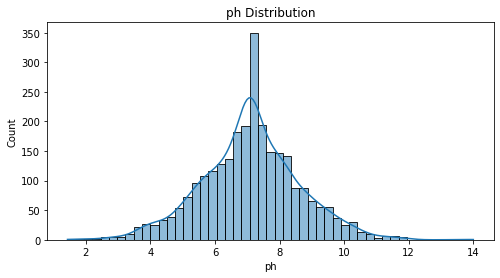

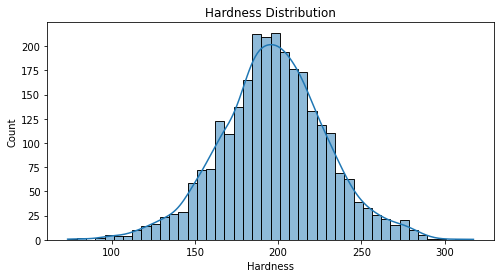

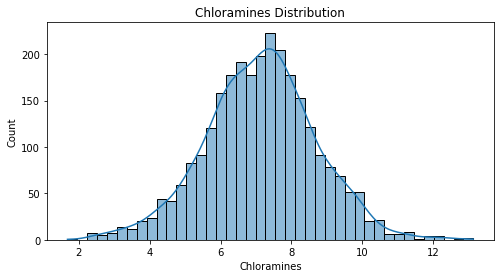

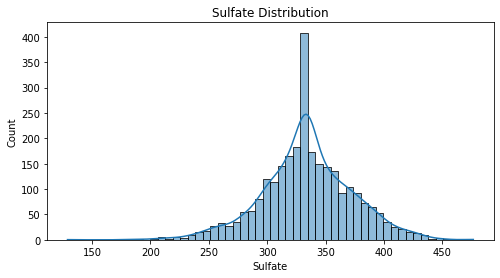

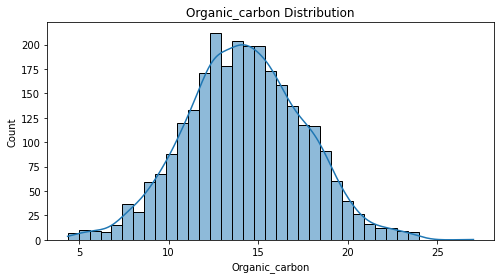

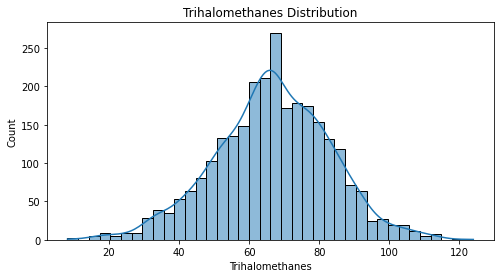

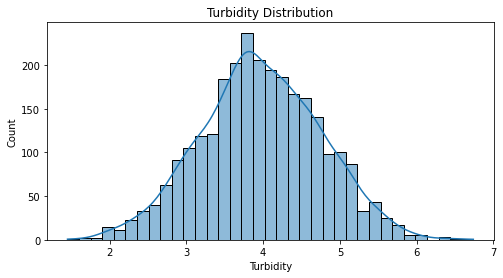

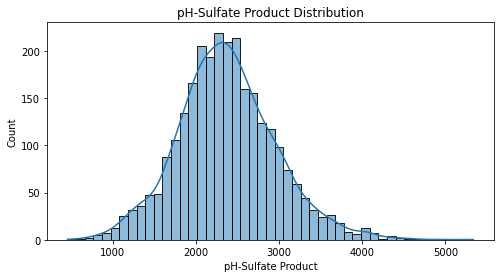

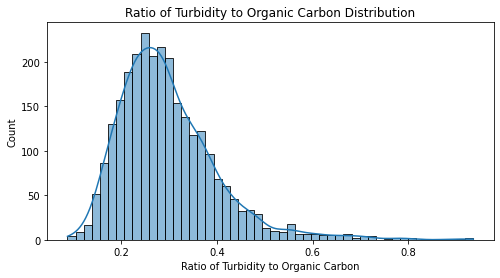

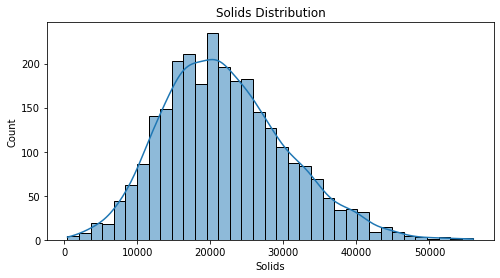

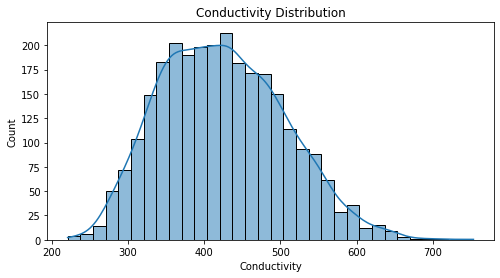

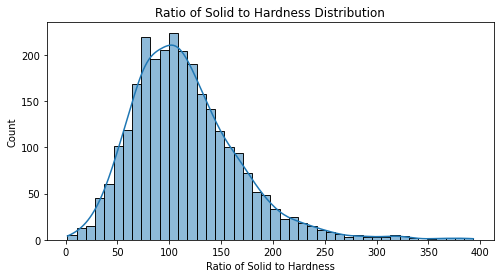

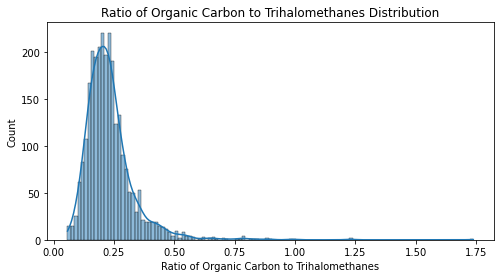

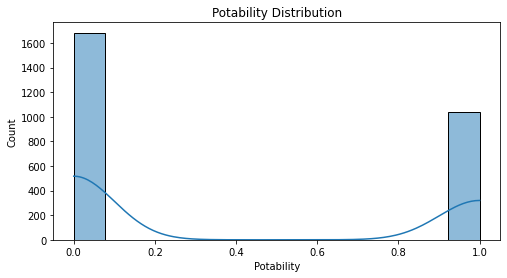

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 从PySpark DataFrame中采样数据，并转换为Pandas DataFrame
sample_data = processed_data.sample(False, 0.5).toPandas()  # 这里我们采样了10%的数据

for column in sample_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=sample_data, x=column, kde=True)
    plt.title(f'{column} Distribution')
    plt.show()


In [36]:
# Data Transformation 
from pyspark.sql.functions import sqrt

processed_data = processed_data.withColumn("Ratio of Turbidity to Organic Carbon", sqrt(col("Ratio of Turbidity to Organic Carbon")))
processed_data = processed_data.withColumn("Ratio of Solid to Hardness", sqrt(col("Ratio of Solid to Hardness")))
processed_data = processed_data.withColumn("Ratio of Organic Carbon to Trihalomethanes", sqrt(col("Ratio of Organic Carbon to Trihalomethanes")))


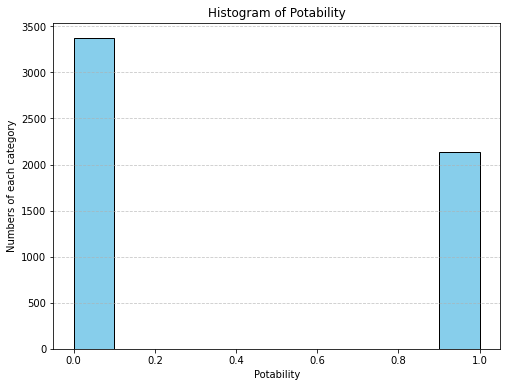

In [36]:
#  Visualization 
Potability_histogram = processed_data.select("Potability").toPandas()["Potability"]

plt.figure(figsize=(8, 6))
plt.hist(Potability_histogram, color='skyblue', edgecolor='black')  
plt.title(f'Histogram of {"Potability"}')
plt.xlabel("Potability") 
plt.ylabel('Numbers of each category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
counts = processed_data.groupBy("Potability").count().collect()

for row in counts:
    print(f"Potability {row['Potability']}: {row['count']}")

Potability 1: 2132
Potability 0: 3371


In [38]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from imblearn.over_sampling import SMOTE
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Split Dataset
train_data, test_data = processed_data.randomSplit([0.8, 0.2], seed=722)

train_pdf = train_data.toPandas()

X_train = train_pdf.drop('Potability', axis=1)
y_train = train_pdf['Potability']

smote = SMOTE(sampling_strategy='minority', random_state=722)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

spark = SparkSession.builder.getOrCreate()
resampled_train_data = spark.createDataFrame(pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name='Potability')], axis=1))

resampled_train_data.groupBy("Potability").count().show()


+----------+-----+
|Potability|count|
+----------+-----+
|         0| 2695|
|         1| 2695|
+----------+-----+



# 06 - DMA


## Random Forest

In [58]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import warnings
warnings.filterwarnings('ignore')
spark.sparkContext.setLogLevel("ERROR")

# Initialize Random Forest classifier
rf = RandomForestClassifier(labelCol="Potability", featuresCol="features", numTrees = 100, maxDepth = 20, minInstancesPerNode = 1)

# Convert data to feature vector (if you haven't already)
feature_cols = [col_name for col_name in resampled_train_data.columns if col_name != 'Potability']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_assembled = assembler.transform(resampled_train_data)
test_assembled = assembler.transform(test_data)

# Train the Random Forest model
rf_model = rf.fit(train_assembled)

# Make predictions
predictions = rf_model.transform(test_assembled)

# Evaluators for accuracy, precision, recall, and f1
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")

# Calculate metrics
accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate a confusion matrix using DataFrame operations
TP = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 1)).count()
TN = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 0)).count()
FP = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 1)).count()
FN = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 0)).count()

print("Confusion Matrix:")
print("[[", TN, ",", FP, "],")
print("[", FN, ",", TP, "]]")

Accuracy: 0.7950089126559715
Precision: 0.7955110397564966
Recall: 0.7950089126559714
F1 Score: 0.7952368486184953


Confusion Matrix:
[[ 558 , 118 ],
[ 112 , 334 ]]


In [45]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import warnings
warnings.filterwarnings('ignore')
spark.sparkContext.setLogLevel("ERROR")

# Initialize Random Forest classifier
rf = RandomForestClassifier(labelCol="Potability", featuresCol="features")

# Set up the parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 50, 100])
             .addGrid(rf.maxDepth, [5, 10, 20])
             .addGrid(rf.minInstancesPerNode, [1, 2, 4])
             .build())

# Define evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")

# Cross-validation
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_assembled)
predictions = cvModel.transform(test_assembled)

# Calculate and print the metrics
accuracy = evaluator.evaluate(predictions)
print("Best Accuracy:", accuracy)

# Retrieve and print the best model's parameters
best_rf_model = cvModel.bestModel
print("Best numTrees:", best_rf_model.getNumTrees)
print("Best maxDepth:", best_rf_model.getOrDefault("maxDepth"))
print("Best minInstancesPerNode:", best_rf_model.getOrDefault("minInstancesPerNode"))



Best Accuracy: 0.7950089126559715
Best numTrees: 100
Best maxDepth: 20
Best minInstancesPerNode: 1


## KNN

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = processed_data.toPandas()

X = pandas_df.drop("Potability", axis=1)
y = pandas_df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=722)

knn = KNeighborsClassifier(n_neighbors = 4, metric="manhattan")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6050878255602665
Precision: 0.4318936877076412
Recall: 0.2127659574468085
F1 Score: 0.2850877192982456
Confusion Matrix:
 [[869 171]
 [481 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.73      1040
           1       0.43      0.21      0.29       611

    accuracy                           0.61      1651
   macro avg       0.54      0.52      0.51      1651
weighted avg       0.57      0.61      0.56      1651



In [50]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for 'k'
k_range = list(range(1, 31))  # example range, can be adjusted
param_grid = dict(n_neighbors=k_range)

# Instantiate grid search
grid = GridSearchCV(KNeighborsClassifier(metric="manhattan"), param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit the grid with data
grid.fit(X_train, y_train)

# Best k value
best_k = grid.best_params_['n_neighbors']
print("Best k:", best_k)


Best k: 4


## Decision Tree

In [50]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Convert data to feature vector
feature_cols = [col_name for col_name in resampled_train_data.columns if col_name != 'Potability']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_assembled = assembler.transform(resampled_train_data)
test_assembled = assembler.transform(test_data)

dt_classifier = DecisionTreeClassifier(labelCol="Potability", featuresCol="features", seed=722)
model = dt_classifier.fit(train_assembled)

predictions = model.transform(test_assembled)

# Evaluate the predictions
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")

accuracy_dt = evaluator_accuracy.evaluate(predictions)
precision_dt = evaluator_precision.evaluate(predictions)
recall_dt = evaluator_recall.evaluate(predictions)
f1_dt = evaluator_f1.evaluate(predictions)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

TP = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 1)).count()
TN = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 0)).count()
FP = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 1)).count()
FN = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 0)).count()

print("Confusion Matrix:")
print("[[", TN, ",", FP, "],")
print("[", FN, ",", TP, "]]")

Accuracy: 0.624777183600713
Precision: 0.6097311743637579
Recall: 0.624777183600713
F1 Score: 0.6053944970168251
Confusion Matrix:
[[ 541 , 135 ],
[ 286 , 160 ]]


In [62]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="Potability", featuresCol="features")

# Set up the parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [3, 5, 7, 10])
             .addGrid(dt.minInstancesPerNode, [1, 2, 4])
             .addGrid(dt.impurity, ["entropy", "gini"])
             .build())

# Set up the cross-validator
cv = CrossValidator(estimator=dt, 
                    estimatorParamMaps=paramGrid, 
                    evaluator=MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy"), 
                    numFolds=5)  # Use 5 folds for cross-validation

# Run cross-validation on resampled_train_data
cvModel = cv.fit(train_assembled)

# Print the best hyperparameters
bestDT = cvModel.bestModel
print("Best Max Depth:", bestDT.getOrDefault("maxDepth"))
print("Best Min Instances Per Node:", bestDT.getOrDefault("minInstancesPerNode"))
print("Best Impurity:", bestDT.getOrDefault("impurity"))


Best Max Depth: 10
Best Min Instances Per Node: 1
Best Impurity: gini


# 07 - DM

In [58]:
# Random Forest
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import warnings
warnings.filterwarnings('ignore')
spark.sparkContext.setLogLevel("ERROR")

# Initialize Random Forest classifier
rf = RandomForestClassifier(labelCol="Potability", featuresCol="features", numTrees = 100, maxDepth = 20, minInstancesPerNode = 1)

# Convert data to feature vector (if you haven't already)
feature_cols = [col_name for col_name in resampled_train_data.columns if col_name != 'Potability']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_assembled = assembler.transform(resampled_train_data)
test_assembled = assembler.transform(test_data)

# Train the Random Forest model
rf_model = rf.fit(train_assembled)

# Make predictions
predictions = rf_model.transform(test_assembled)

# Evaluators for accuracy, precision, recall, and f1
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Potability", predictionCol="prediction", metricName="f1")

# Calculate metrics
accuracy_rf = evaluator_accuracy.evaluate(predictions)
precision_rf = evaluator_precision.evaluate(predictions)
recall_rf = evaluator_recall.evaluate(predictions)
f1_rf = evaluator_f1.evaluate(predictions)

# Print metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Generate a confusion matrix using DataFrame operations
TP = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 1)).count()
TN = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 0)).count()
FP = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 1)).count()
FN = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 0)).count()

print("Confusion Matrix:")
print("[[", TN, ",", FP, "],")
print("[", FN, ",", TP, "]]")

evaluator_auc = BinaryClassificationEvaluator(labelCol="Potability", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)
print("AUC:", auc)

# Classification Report
TP = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 1)).count()
TN = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 0)).count()
FP = predictions.filter((predictions.Potability == 0) & (predictions.prediction == 1)).count()
FN = predictions.filter((predictions.Potability == 1) & (predictions.prediction == 0)).count()

precision_0 = TN / (TN + FN) if (TN + FN) != 0 else 0
recall_0 = TN / (TN + FP) if (TN + FP) != 0 else 0
f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) != 0 else 0

precision_1 = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_1 = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_1 = 2 * (precision_1 * recall_1) / (precision_1 + recall_1) if (precision_1 + recall_1) != 0 else 0

print("Classification Report:\n")
print("Class\tPrecision\tRecall\tF1-score")
print("0\t{:.2f}\t\t{:.2f}\t{:.2f}".format(precision_0, recall_0, f1_0))
print("1\t{:.2f}\t\t{:.2f}\t{:.2f}".format(precision_1, recall_1, f1_1))

Accuracy: 0.7976827094474154
Precision: 0.7988419372502418
Recall: 0.7976827094474153
F1 Score: 0.7981536942894463


Confusion Matrix:
[[ 556 , 120 ],
[ 107 , 339 ]]


AUC: 0.8717429086953072


Classification Report:

Class	Precision	Recall	F1-score
0	0.84		0.82	0.83
1	0.74		0.76	0.75


## Visualization 

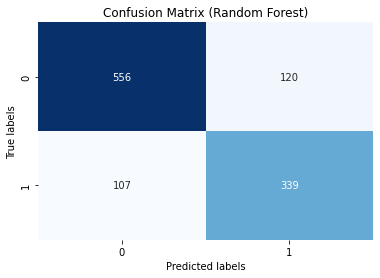

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert the Spark DataFrame to a Pandas DataFrame
predictions_pd = predictions.select("Potability", "prediction").toPandas()

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(predictions_pd["Potability"], predictions_pd["prediction"])

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


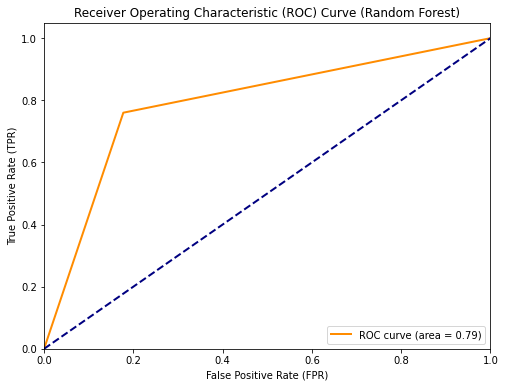

In [65]:
from sklearn.metrics import roc_curve, auc

true_positive = confusion_matrix[1, 1]
false_positive = confusion_matrix[0, 1]
true_negative = confusion_matrix[0, 0]
false_negative = confusion_matrix[1, 0]

tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)

fpr_list = [0, fpr, 1]
tpr_list = [0, tpr, 1]

roc_auc = auc(fpr_list, tpr_list)

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()


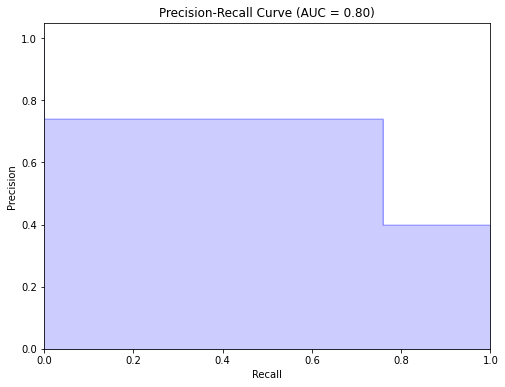

In [74]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(predictions_pd["Potability"], predictions_pd["prediction"])

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc))
plt.show()


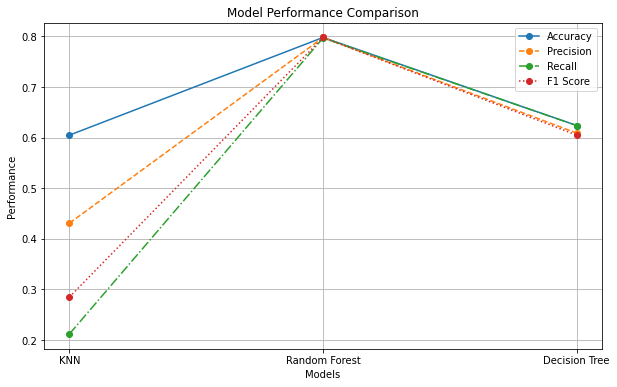

In [76]:
models = ['KNN', 'Random Forest', 'Decision Tree']
accuracy = [0.605, 0.798, 0.624]
precision = [0.431, 0.798, 0.609]
recall = [0.212, 0.797, 0.624]
f1_score = [0.285, 0.798, 0.605]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', label='Accuracy', linestyle='-')
plt.plot(models, precision, marker='o', label='Precision', linestyle='--')
plt.plot(models, recall, marker='o', label='Recall', linestyle='-.')
plt.plot(models, f1_score, marker='o', label='F1 Score', linestyle=':')
plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()
